# The Movie Database (TMDb) and Voter Patterns
<ul>by Reema Mohsin

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) holds extensive information on thousands of movies that were released over the last few decades. Not only does this database contain details on the production of the movie (such as director, production company, budget, etc) it also has data on how viewers voted the movie on the site. 

In this project, I will analyze a dataset provided by TMDb and investigate its data points to assess the properties that are associated with highly popular movies. First, I will clean the data, then I will provide various visualizations through Matplotlib to identify patterns in the data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this step, I will load in the data, inspect its properties, and then trim and clean it for readability and analysis. 

### General Properties

In [2]:
#the .csv file is loaded into a dataframe
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

After loading the dataset into a dataframe from the .csv file, I viewed the first few rows to get an initial idea of the data and how it is presented as well as inspected the information of the columns, objects, and data types used. 

### Data Cleaning

In [4]:
#check for any duplicates
df.duplicated().sum()

1

In [5]:
#remove one duplicated row
df.drop_duplicates(inplace = True)
#check to see if row removed
df.shape 

(10865, 21)

First, I checked the dataset for any duplicated rows. This table had only one duplicate which I removed. 

In [6]:
#remove unnecessary columns
df.drop(['imdb_id','homepage','budget','revenue','tagline','overview','release_date','keywords'], axis=1, inplace=True)

Second, I removed any unnecessary columns that provide little to no quantifiable value so that the table only contains information pertinent to my analysis. 
* **imdb_id:** This value is not necessary in analyzing information within the table. 
* **homepage, tagline, overview, keywords:** These values are unique to each row and cannot be used to make comparisons across multiple rows.
* **budget, revenue:** Since the 'budget_adj' and 'revenue_adj' columns adjust the budget and revenue values in terms of 2010 dollars and will therefore allow for more accurate comparisons and analysis, these columns are not needed. 
* **release_date:** I will be using release year to analyze this data, so this more specific column is not needed. 

In [7]:
#rename columns for better readability
df.rename(columns = {'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace=True)
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget                  10865 non-null float64
revenue                 10865 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


I renamed the 'budget_adj' and 'revenue_adj' columns to make them more readable.

In [34]:
#remove rows with null values
df.dropna(inplace = True)
df.isnull().sum()
df.shape

(9772, 13)

I removed rows with any null values in them, dropping the row count from 10,865 to 9,772.

Next, I will transform the 'genres' column to make it easier to work with.

In [11]:
#turn string into list
df['genres'] = df['genres'].str.split('|')
df.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [17]:
#create new table with genres listed out by row
df_gen = df.genres.apply(pd.Series)
df_gen.head(3)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN


In [18]:
#merge both tables
df_gen=df.merge(df_gen, left_index=True, right_index = True)
df_gen.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue,0,1,2,3,4
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,NaN
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,NaN
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,NaN,NaN


'Genres' was originally presented as a string of genre types separated by a '|'. This makes it difficult to narrow down movies by one specific genre. First, I turned the strings into a list and then separated the items into their own columns in a new table. Then I merged this table with the original table. 

In [19]:
#pivot genres from columns into rows
df_gen=df_gen.melt(id_vars=['id','popularity','original_title','cast','director','runtime','genres','production_companies','vote_count','vote_average','release_year','budget','revenue'],value_name="genre")
df_gen.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue,variable,genre
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,0,Action
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,0,Action
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,0,Adventure


In [20]:
#remove unnecessary columns
df_gen.drop(['genres','variable'],axis=1,inplace=True)
df_gen.head(1)

,id,popularity,original_title,cast,director,runtime,production_companies,vote_count,vote_average,release_year,budget,revenue,genre
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action


Next, I pivoted the genre values so that they are presented in their own rows instead of columns. Lastly, I removed the original 'genres' row and the 'variable' row that was created by my use of the melt() function. 

In [21]:
#remove rows with null values
df_gen.dropna(inplace=True)
df_gen.shape

(24650, 13)

Lastly, I dropped all rows with null values again. I now have two tables, df and df_gen. The first table is the original table of 9,772 rows and the second is the new table where each movie is presented in a row for every genre it is associated with. 

<a id='eda'></a>
## Exploratory Data Analysis

In this step, I will explore the data to answer the below question and plot different visualizations to identify patterns and dependencies. 

### What properties are associated with highly rated movies?

There are two rows that can be used to understand the favorability of a movie, 'popularity' and 'vote_average'. I compare these columns with each other to identify which one will be more helpful in answering my question. 

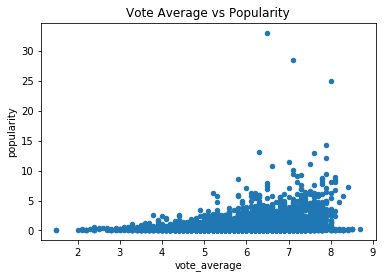

In [36]:
df.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('Vote Average vs Popularity')
plt.show()

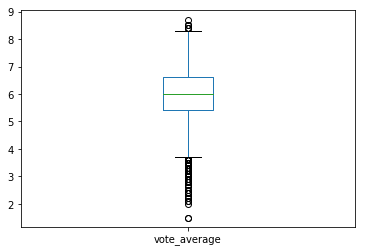

In [37]:
df['vote_average'].plot(kind='box')
plt.show()

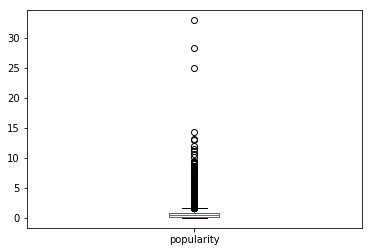

In [38]:
df['popularity'].plot(kind='box')
plt.show()

I want to first check to make sure that both 'popularity' and 'vote_average' represent the same thing. The scatter plot above illustrates that both columns are positively correlated. However, as shown by the box plots, 'vote_average' is more evenly distributed and lacks any outliers. Therefore, all following analysis will be done with 'vote_average'. 

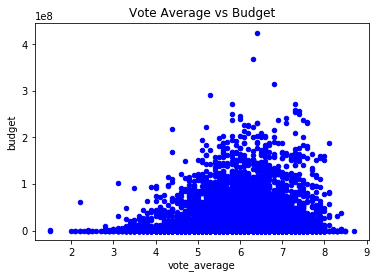

In [56]:
df.plot(x='vote_average',y='budget',kind='scatter', color = 'blue')
plt.title('Vote Average vs Budget')
plt.show()

This scatter plot illustrates a positive correlation, which means that movies with higher budgets tend be more highly voted by viewers. 

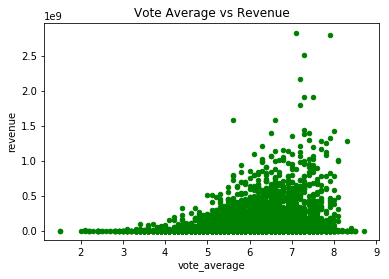

In [48]:
df.plot(x='vote_average',y='revenue',kind='scatter', color = 'green')
plt.title('Vote Average vs Revenue')
plt.show()

The above plot also indicates a positive correlation between revenue and vote average. This means that movies that are more highly rated by viewers tend to make more in revenue. 

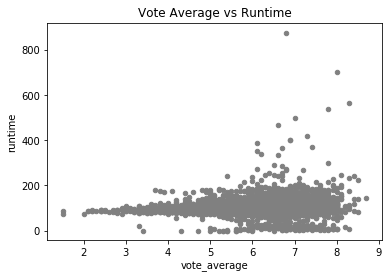

In [55]:
df.plot(x='vote_average',y='runtime',kind='scatter', color = 'gray')
plt.title('Vote Average vs Runtime')
plt.show()

This scatter plot suggests a weaker relationship between vote average and runtime. Though it appears that the longest movies have a higher vote average, there doesn't seem to be a decisive pattern between the two variables in general. 

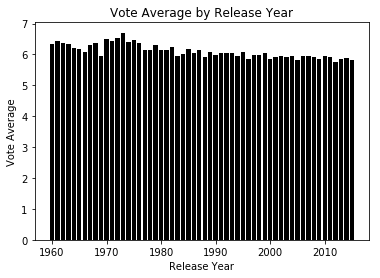

In [51]:
yearly_df = df.groupby('release_year').mean()
plt.bar(yearly_df.index,yearly_df['vote_average'], color = 'black')
plt.title('Vote Average by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.show()

To create the above chart, I made a new dataframe that grouped the movies by release year. Then I plotted the vote average by release year on a bar chart. 

In this bar chart, there seems to be a slight downward slope in vote average over time. Though there isn't necessarily a clear trend, it is safe to say that the most highly voted movies on TMDb were released between 1960 and 1980. 

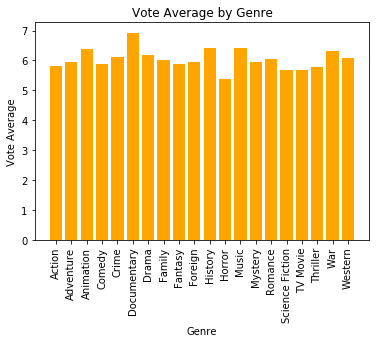

In [53]:
df_gen_gen=df_gen.groupby('genre').mean()
df_gen_gen=df_gen_gen.sort_values('vote_average')
df_gen_gen
plt.bar(df_gen_gen.index,df_gen_gen['vote_average'], color = 'orange')
plt.xticks(rotation='90')
plt.title('Vote Average by Genre')
plt.ylabel('Vote Average')
plt.xlabel('Genre')
plt.show()

To compare vote averge by genre, I used the new table I made while cleaning the data (df_gen) to create another table that displays the mean value of all columns aggregated by genre type. Then I plotted the vote average mean on a bar chart for each genre. 

The chart shows that the lowest rated movies are horror, sci-fi, and TV movie, while the highest rated are documentary, history, and music. 

<a id='conclusions'></a>
## Conclusions

There are many qualities about movies that make them unique from one another. In this project, I was able to analyze these qualities and identify which properties are associated with movie popularity. 

After cleaning and trimming the dataset by removing unnecessary, null, and duplicated values, I created a secondary table that broke each movie down into the separate genres it falls under. 

Then I plotted a few charts to assess what will be used as the dependent variable, popularity or vote average. Because vote average was more evenly distributed, I used this as the variable that indicates favorability among viewers. 

Next, I plotted various other variables against vote average and found that movies with higher vote averages tend to have higher budgets and higher revenue. I also found that movies released between 1960-1980, documentaries, history movies, and music movies tend to be voted higher than others. 

Since my analysis only illustrates correlation between variables, it does not definitively conclude whether any trait can predict the vote average of a movie. That would require deeper statistical analysis that was not performed in this project.


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0